In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
CSV_FILE_PATH = 'ankle_sequence.csv'

In [11]:
def plot_keypoint_data(csv_path: str):
    """
    Reads the keypoint sequence from the CSV and generates time-series plots
    and a 2D trajectory plot.
    """
    if not os.path.exists(csv_path):
        print(f"Error: CSV file not found at {csv_path}")
        # Create dummy data if file doesn't exist
        try:
            df = create_dummy_csv(csv_path)
        except Exception as e:
            print(f"Could not create dummy data: {e}")
            return
    else:
        print(f"Loading data from {csv_path}...")
        try:
            df = pd.read_csv(csv_path)
        except Exception as e:
            print(f"Error reading CSV: {e}")
            return

    if df.empty or 'frame' not in df.columns or 'x' not in df.columns or 'y' not in df.columns:
        print("Error: DataFrame is empty or missing required columns (frame, x, y).")
        return

    # --- Plotting Vertical Position (Y) vs. Time ---
    plt.figure(figsize=(12, 6))
    plt.plot(df['frame'], df['y'], label='Vertical Position (Y)', color='teal', linewidth=2)
    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) Vertical Position Over Time', fontsize=16)
    plt.xlabel('Frame Number (Time)', fontsize=14)
    plt.ylabel('Y-Coordinate (Pixels, Higher Value = Lower on Screen)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    
    # --- Plotting Horizontal Position (X) vs. Time ---
    plt.figure(figsize=(12, 6))
    plt.plot(df['frame'], df['x'], label='Horizontal Position (X)', color='firebrick', linewidth=2)
    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) Horizontal Position Over Time', fontsize=16)
    plt.xlabel('Frame Number (Time)', fontsize=14)
    plt.ylabel('X-Coordinate (Pixels)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    
    # --- NEW: Plotting 2D Trajectory (Y vs. X) ---
    plt.figure(figsize=(8, 8)) # Square aspect ratio is often better for trajectories
    
    # Plot the path. Use 'o' for scatter and connect them with a line.
    plt.plot(df['x'], df['y'], color='darkgreen', linewidth=1, marker='.', markersize=4, label='Ankle Path')
    
    # Scatter the first point to indicate start
    plt.scatter(df['x'].iloc[0], df['y'].iloc[0], color='blue', s=50, label='Start Frame', zorder=5)
    
    # Scatter the last point to indicate end
    plt.scatter(df['x'].iloc[-1], df['y'].iloc[-1], color='red', s=50, label='End Frame', zorder=5)

    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) 2D Trajectory', fontsize=16)
    plt.xlabel('X-Coordinate (Horizontal Position)', fontsize=14)
    # The Y-axis is inverted to match standard image coordinates
    plt.ylabel('Y-Coordinate (Vertical Position, Up is Down)', fontsize=14) 
    
    # Invert the Y-axis so the plot is intuitive (lower on graph = lower on screen)
    plt.gca().invert_yaxis() 
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal') # Helps visualize the shape without distortion
    plt.legend()
    plt.tight_layout()
    
    plt.show()


Loading data from ankle_sequence.csv...


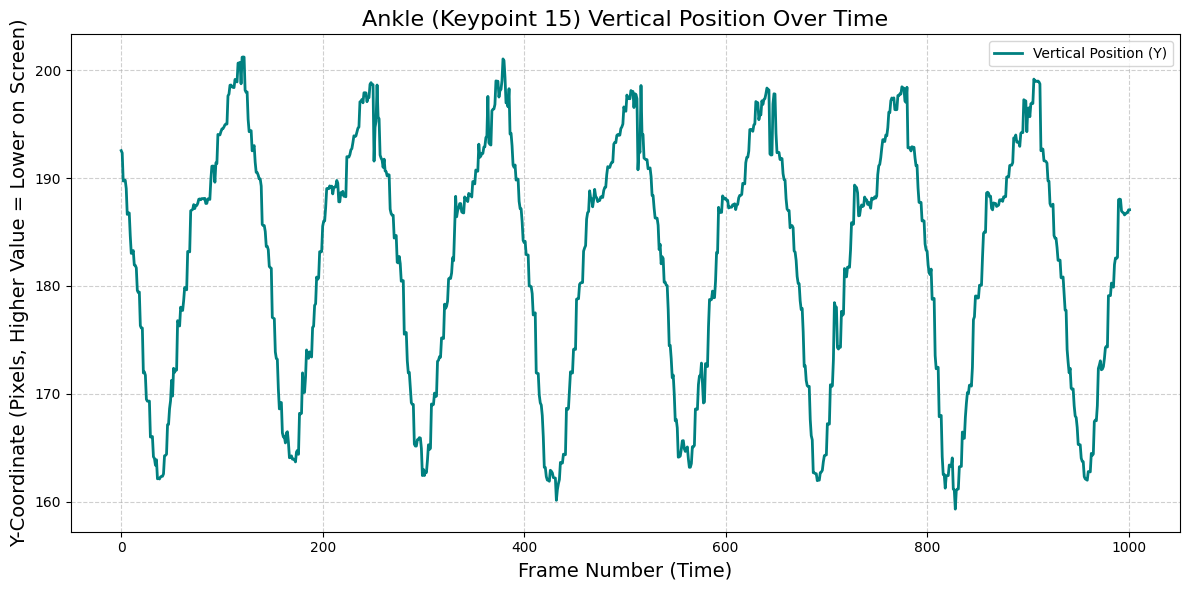

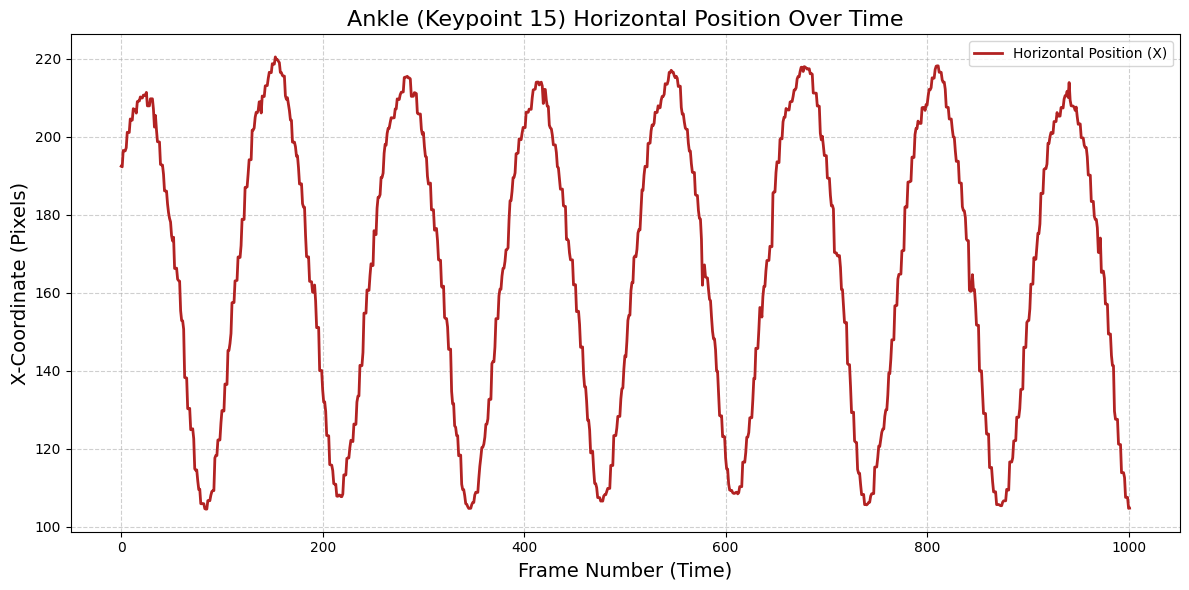

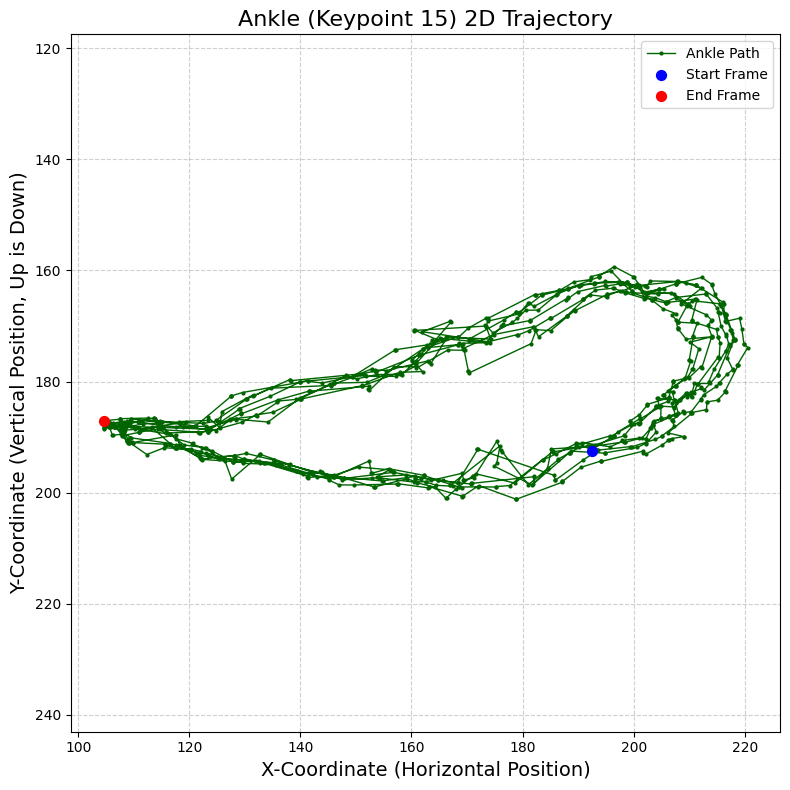

In [12]:
plot_keypoint_data(CSV_FILE_PATH)

In [16]:

def plot_2d_trajectory(df: pd.DataFrame):
    """
    Plots the keypoint's X and Y coordinates on a single 2D plane (the requested function).
    This visualizes the physical path taken by the ankle during the stride.
    """
    plt.figure(figsize=(8, 8)) # Square aspect ratio is recommended for trajectories
    
    # Plot the path. Use marker='.' and connect them with a line to show time flow.
    plt.plot(df['x'], df['y'], color='darkgreen', linewidth=1.5, marker='.', markersize=4, label='Ankle Path')
    
    # Highlight start and end points
    plt.scatter(df['x'].iloc[0], df['y'].iloc[0], color='blue', s=80, label='Start Frame', zorder=5)
    plt.scatter(df['x'].iloc[-1], df['y'].iloc[-1], color='red', s=80, label='End Frame', zorder=5)

    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) 2D Trajectory - Gait Cycle', fontsize=16)
    plt.xlabel('X-Coordinate (Horizontal Position)', fontsize=14)
    # Invert the Y-axis for a natural view (higher on screen = lower Y-value in data)
    plt.ylabel('Y-Coordinate (Vertical Position, Upward Movement = Higher on Plot)', fontsize=14) 
    
    # Invert the Y-axis so the plot is intuitive (e.g., foot swing up looks like upward movement)
    plt.gca().invert_yaxis() 
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal') # Use 'equal' to prevent distortion of the path shape
    plt.legend()
    plt.tight_layout()


def plot_keypoint_data(csv_path: str):
    """
    Reads the keypoint sequence from the CSV and generates:
    1. Y vs. Time plot
    2. X vs. Time plot
    3. 2D Trajectory (Y vs. X) plot
    """
    if not os.path.exists(csv_path):
        print(f"Error: CSV file not found at {csv_path}")
        # Create dummy data if file doesn't exist
        try:
            df = create_dummy_csv(csv_path)
        except Exception as e:
            print(f"Could not create dummy data: {e}")
            return
    else:
        print(f"Loading data from {csv_path}...")
        try:
            df = pd.read_csv(csv_path)
        except Exception as e:
            print(f"Error reading CSV: {e}")
            return

    if df.empty or 'frame' not in df.columns or 'x' not in df.columns or 'y' not in df.columns:
        print("Error: DataFrame is empty or missing required columns (frame, x, y).")
        return

    # --- Plotting Vertical Position (Y) vs. Time ---
    plt.figure(figsize=(12, 6))
    plt.plot(df['frame'], df['y'], label='Vertical Position (Y)', color='teal', linewidth=2)
    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) Vertical Position Over Time', fontsize=16)
    plt.xlabel('Frame Number (Time)', fontsize=14)
    plt.ylabel('Y-Coordinate (Pixels, Lower Value = Higher off Ground)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    
    # --- Plotting Horizontal Position (X) vs. Time ---
    plt.figure(figsize=(12, 6))
    plt.plot(df['frame'], df['x'], label='Horizontal Position (X)', color='firebrick', linewidth=2)
    plt.title(f'Ankle (Keypoint {KEYPOINT_TO_TRACK}) Horizontal Position Over Time', fontsize=16)
    plt.xlabel('Frame Number (Time)', fontsize=14)
    plt.ylabel('X-Coordinate (Pixels)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    
    # --- Call the new 2D trajectory function ---
    plot_2d_trajectory(df)
    
    plt.show()

Loading data from ankle_sequence.csv...


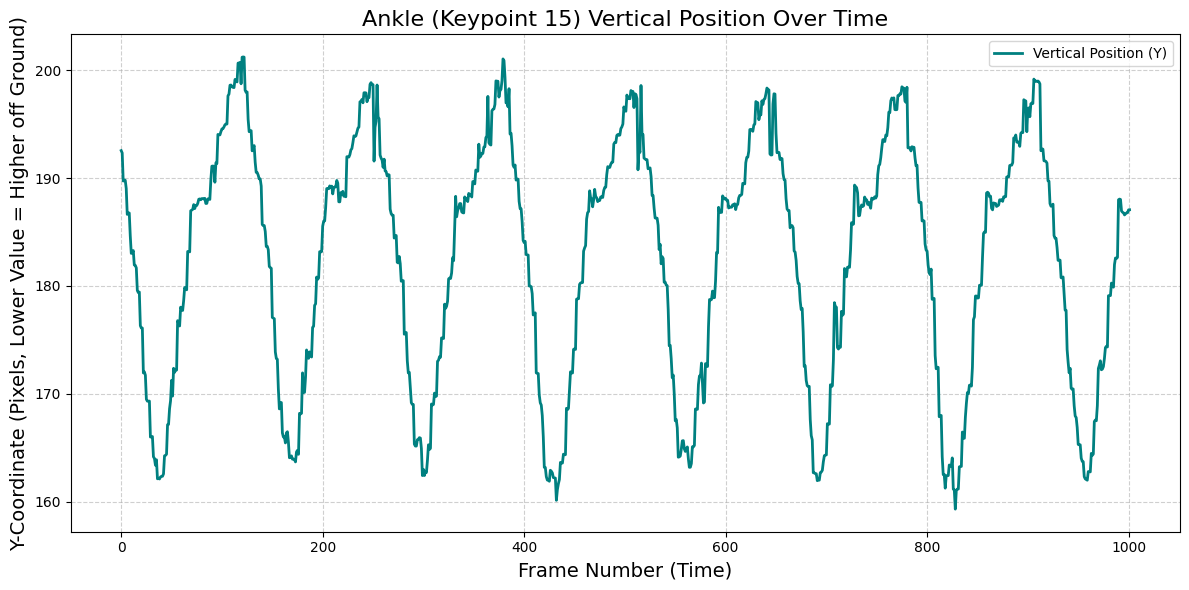

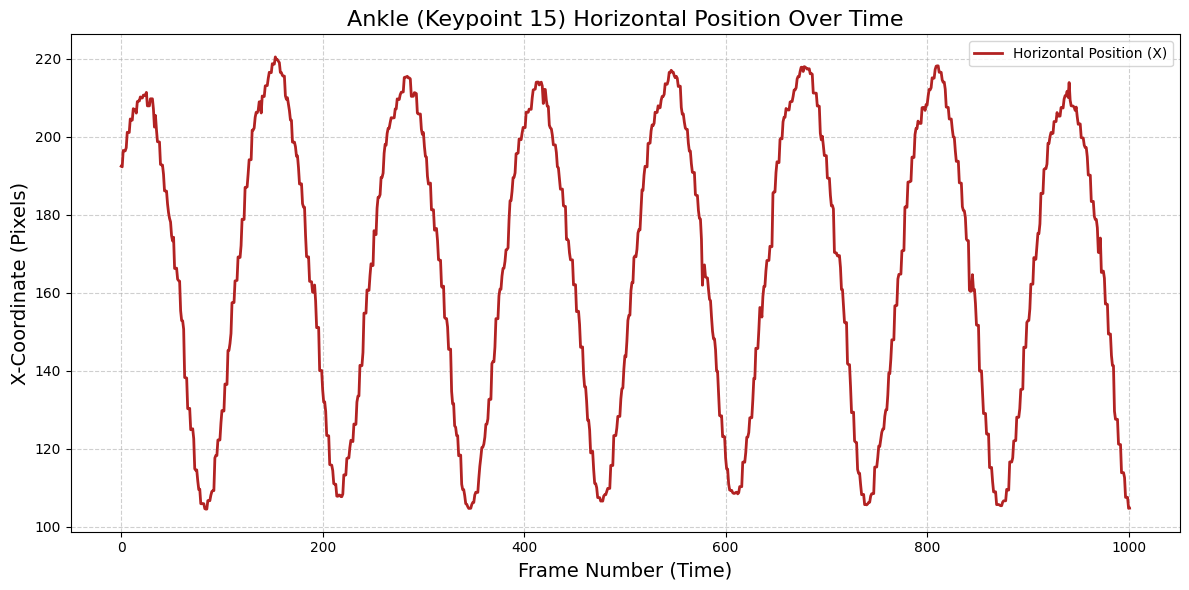

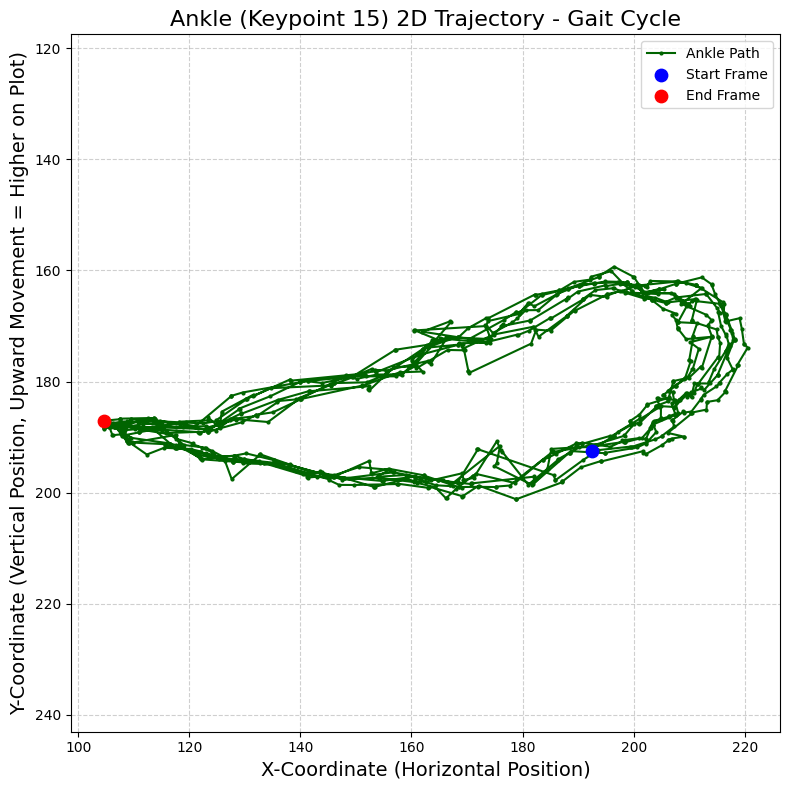

In [20]:
plot_keypoint_data(CSV_FILE_PATH)

In [41]:
KEYPOINT_TO_TRACK = 15 # Keypoint index (e.g., Left Ankle)
OUTPUT_POINTS = 20 # Target number of points for the simplified footpath
NORMALIZED_STRIDE_LENGTH = 100 # Standard number of points for each stride (100 = 100% of cycle)


In [44]:
def find_strides_and_average(df: pd.DataFrame, normalized_length: int = 100) -> pd.DataFrame:
    """
    Identifies multiple stride cycles, normalizes their length, and computes 
    the average X and Y trajectory across the entire sequence.
    """
    if df.empty:
        return pd.DataFrame()

    # --- Step 1: Manual Peak Detection (Finding Stride Start/End) ---
    # Stride markers are typically found at maximum vertical rise (highest off-ground point).
    # Since Y=0 is top, higher Y values mean lower position (closer to treadmill).
    # We look for the lowest Y values (maximum off-ground) with a simple local minimum finder.
    
    y_vals = df['y'].values
    stride_markers = [0] # Start at frame 0
    window = 10 # Window size for peak/trough detection
    
    for i in range(window, len(y_vals) - window):
        # Look for local minimum (highest point off the ground)
        if y_vals[i] < np.min(y_vals[i-window:i]) and y_vals[i] < np.min(y_vals[i+1:i+window+1]):
            # This is a local minimum, mark it as a potential stride start/end
            if i - stride_markers[-1] > window: # Ensure peaks are separated
                stride_markers.append(i)
                
    stride_markers.append(len(df) - 1) # End at the last frame
    
    if len(stride_markers) < 2:
        print("Warning: Could not detect enough strides. Returning single cycle segment.")
        # Fallback to the single segment if not enough cycles were found
        return df.iloc[30:70].copy().reset_index(drop=True)


    # --- Step 2: Extract and Normalize Strides ---
    all_normalized_strides = []
    
    for i in range(len(stride_markers) - 1):
        start = stride_markers[i]
        end = stride_markers[i+1]
        
        stride_segment = df.iloc[start:end+1]
        if len(stride_segment) < 2:
            continue
            
        # Resample the X and Y coordinates to the target normalized length (100 points)
        current_indices = np.linspace(0, 1, len(stride_segment))
        target_indices = np.linspace(0, 1, normalized_length)
        
        normalized_x = np.interp(target_indices, current_indices, stride_segment['x'].values)
        normalized_y = np.interp(target_indices, current_indices, stride_segment['y'].values)
        
        all_normalized_strides.append(pd.DataFrame({'x': normalized_x, 'y': normalized_y}))

    
    if not all_normalized_strides:
        return pd.DataFrame()

    # --- Step 3: Compute the Average Trajectory ---
    
    # Concatenate all normalized strides into one DataFrame
    combined_strides = pd.concat(all_normalized_strides, ignore_index=True)
    
    # Group by the normalized index (0 to 99) and find the mean
    # We use integer division // to assign each point to its normalized bin
    combined_strides['normalized_index'] = combined_strides.index % normalized_length
    
    averaged_stride = combined_strides.groupby('normalized_index')[['x', 'y']].mean().reset_index(drop=True)
    
    print(f"Successfully averaged {len(all_normalized_strides)} stride cycles.")
    return averaged_stride

def simplify_footpath(df: pd.DataFrame, target_points: int = 8) -> np.ndarray:
    """
    Simplifies a single, representative 2D path (X, Y) using a conceptual 
    RDP simulation (uniform downsampling) to retain the shape.
    
    NOTE: This function now expects the input 'df' to be the single averaged stride.
    """
    if df.empty:
        return np.array([])

    path = df[['x', 'y']].values
    if len(path) < 3:
        return path 

    # --- Simplified RDP Simulation (Uniform Downsampling) ---
    
    step = max(1, int(np.ceil(len(path) / target_points)))
    simplified_path = path[::step]
    
    # Trim to the exact number of points if necessary
    if len(simplified_path) > target_points:
         simplified_path = simplified_path[:target_points]

    print(f"Averaged path simplified from {len(path)} points to {len(simplified_path)} points.")
    return simplified_path


def plot_2d_trajectory(raw_df: pd.DataFrame, averaged_df: pd.DataFrame, simplified_path: np.ndarray = None):
    """
    Plots the raw data, the computed average stride, and the simplified footpath.
    """
    plt.figure(figsize=(8, 8)) 
    
    # Plot the full raw path (faint background)
    #plt.plot(raw_df['x'], raw_df['y'], color='lightgray', linestyle=':', label='Full Raw Path (All Frames)', zorder=1)
    
    # Plot the computed average stride (this is the key output)
    if not averaged_df.empty:
        plt.plot(averaged_df['x'], averaged_df['y'], color='darkblue', linewidth=3, label='Averaged Stride Trajectory', zorder=2)
    
    # Plot the simplified path (the characteristic "Footpath")
    if simplified_path is not None and len(simplified_path) > 1:
        # Simplified path points (The "Footpath" output)
        plt.scatter(simplified_path[:, 0], simplified_path[:, 1], color='red', s=100, label=f'Simplified Footpath ({len(simplified_path)} Points)', zorder=5)
        # Connect the simplified points
        plt.plot(simplified_path[:, 0], simplified_path[:, 1], color='red', linestyle='-', linewidth=1.5, zorder=4)
        
        # Add point numbers for clarity
        for i, (x, y) in enumerate(simplified_path):
             plt.annotate(str(i+1), (x + 2, y + 2), color='red', fontsize=10)


    plt.title(f'Averaged Ankle Trajectory and Simplified Footpath', fontsize=16)
    plt.xlabel('X-Coordinate (Horizontal Position)', fontsize=14)
    plt.ylabel('Y-Coordinate (Vertical Position, Upward Movement = Higher on Plot)', fontsize=14) 
    
    # Invert the Y-axis so the plot is intuitive (upward swing is plotted up)
    plt.gca().invert_yaxis() 
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal') # Prevents distortion
    plt.legend()
    plt.tight_layout()


def plot_keypoint_data(csv_path: str):
    """
    Main function to load data, average strides, simplify the path, and plot the results.
    """
    if not os.path.exists(csv_path):
        df = create_dummy_csv(csv_path)
    else:
        print(f"Loading data from {csv_path}...")
        try:
            df = pd.read_csv(csv_path)
        except Exception as e:
            print(f"Error reading CSV: {e}")
            return

    if df.empty or 'frame' not in df.columns or 'x' not in df.columns or 'y' not in df.columns:
        print("Error: DataFrame is empty or missing required columns (frame, x, y).")
        return

    # --- 1. AVERAGE THE STRIDES ---
    averaged_stride_df = find_strides_and_average(df, normalized_length=NORMALIZED_STRIDE_LENGTH)
    
    # --- 2. Simplify the averaged path ---
    simplified_path = simplify_footpath(averaged_stride_df, target_points=OUTPUT_POINTS)

    # --- 3. Plot the 2D trajectory with the simplified path overlaid ---
    plot_2d_trajectory(df, averaged_stride_df, simplified_path)
    
    # --- 4. (Optional) Plotting Time-Series data (Y vs. Frame) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df['frame'], df['y'], color='teal', linewidth=2)
    plt.title('Vertical Position (Y) Over Time (Key for Cycle Detection)', fontsize=14)
    plt.xlabel('Frame Number (Time)')
    plt.ylabel('Y-Coordinate (Lower Value = Higher off Ground)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.show()

Loading data from ankle_sequence.csv...
Successfully averaged 13 stride cycles.
Averaged path simplified from 100 points to 20 points.


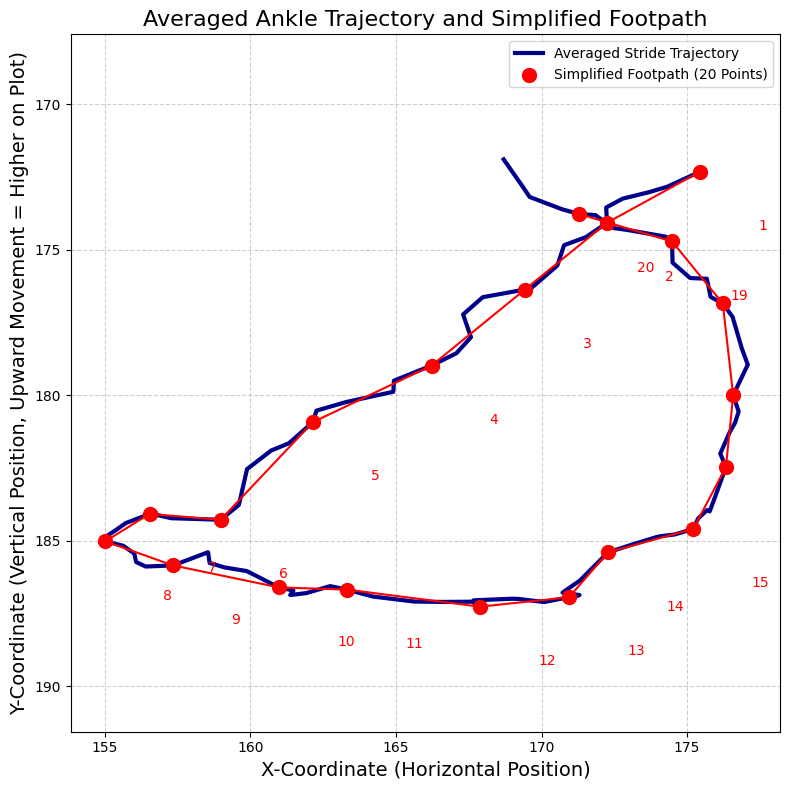

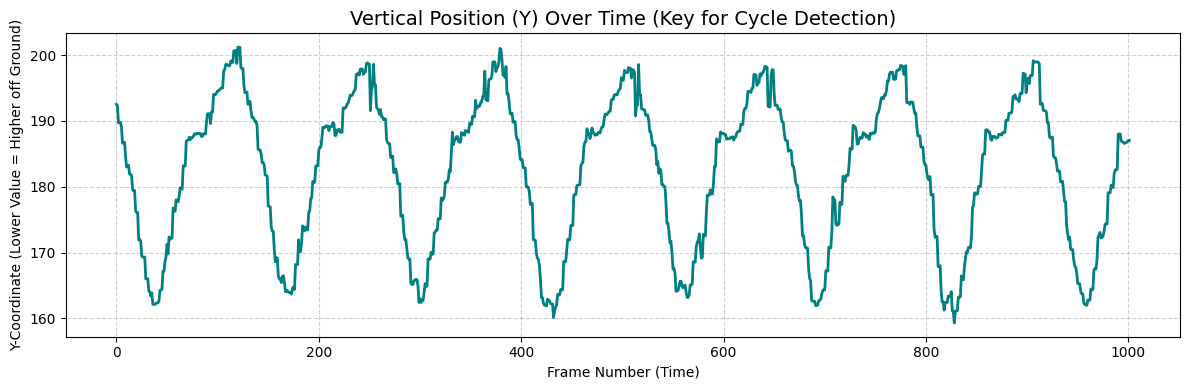

In [45]:
plot_keypoint_data(CSV_FILE_PATH)